In [2]:
import numpy as np

we are creating a dataset with 1 feature, so it will have 2 parameters. also our dataset will have 100 samples

In [3]:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(n,)
y = w1 + w0 * X + np.random.randn(n,)

In [4]:
print(X.shape)
print(y.shape)

(100,)
(100,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.20, random_state=42)
print(X_test.shape, y_test.shape, X_train.shape,y_train.shape)

(20,) (20,) (80,) (80,)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
X_train[:5]

array([7.28554364, 9.55725987, 7.36504195, 2.57927873, 1.7304833 ])

In [8]:
y_train[:5]

array([30.99352103, 40.83931929, 32.45436637, 12.80306994,  8.99565564])

## lets visualise the tarining set

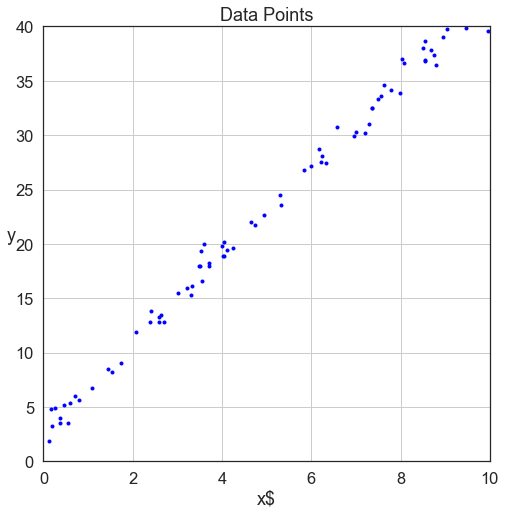

In [9]:
sns.set_style("white")
f = plt.figure(figsize = (8,8))
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth":2.5})

plt.plot(X_train,y_train,"b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("x$",fontsize = 18)
plt.ylabel("y",rotation = 0, fontsize = 18)
plt.axis([0,10,0,40])
plt.show()

In [10]:
def add_dummy_feature(x):
    return np.column_stack((np.ones(x.shape[0]),x))

In [13]:
import unittest
class TestAddDummyFeature(unittest.TestCase):
    def test_add_dummy_feature(self):
        train_matrix = np.array([[3,2,5],[9,4,7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        #test the shape
        self.assertEqual(train_matrix_with_dummy_feature.shape, (2,4))

        #add contents
        np.testing.assert_array_equal(
            train_matrix_with_dummy_feature,
            np.array([[1,3,2,5],[1,9,4,7]]))
        unittest.main(argv=[''], defaultTest='TestAddDummyFeature', verbosity=2, exit=False)